In [1]:
from sklearn import datasets 
data = datasets.load_breast_cancer()

In [2]:
X, y = data.data, data.target

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =scaler.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(455, 30)
(114, 30)


In [6]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(569,)
(455,)
(114,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#initialize ANN
model = Sequential()

In [9]:
# layers
model.add(Dense(units = 16, activation = 'relu', input_dim = 30))  
model.add(Dense(units = 8, activation = 'relu')) 
model.add(Dense(units = 6, activation = 'relu')) 
model.add(Dense(units = 1, activation = 'sigmoid'))  

In [10]:
from keras.optimizers import Adam
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [12]:
h= model.fit(X_train,
             y_train,
             batch_size = 32,
             epochs = 150,
             verbose = 2,
             validation_split = 0.2)

Epoch 1/150
12/12 - 0s - loss: 0.6945 - accuracy: 0.4505 - val_loss: 0.6877 - val_accuracy: 0.4945
Epoch 2/150
12/12 - 0s - loss: 0.6826 - accuracy: 0.6429 - val_loss: 0.6755 - val_accuracy: 0.6813
Epoch 3/150
12/12 - 0s - loss: 0.6643 - accuracy: 0.7115 - val_loss: 0.6542 - val_accuracy: 0.7473
Epoch 4/150
12/12 - 0s - loss: 0.6382 - accuracy: 0.7610 - val_loss: 0.6252 - val_accuracy: 0.8022
Epoch 5/150
12/12 - 0s - loss: 0.6014 - accuracy: 0.8297 - val_loss: 0.5801 - val_accuracy: 0.8571
Epoch 6/150
12/12 - 0s - loss: 0.5484 - accuracy: 0.8681 - val_loss: 0.5207 - val_accuracy: 0.8901
Epoch 7/150
12/12 - 0s - loss: 0.4863 - accuracy: 0.9066 - val_loss: 0.4542 - val_accuracy: 0.9011
Epoch 8/150
12/12 - 0s - loss: 0.4184 - accuracy: 0.9231 - val_loss: 0.3894 - val_accuracy: 0.9231
Epoch 9/150
12/12 - 0s - loss: 0.3519 - accuracy: 0.9341 - val_loss: 0.3251 - val_accuracy: 0.9231
Epoch 10/150
12/12 - 0s - loss: 0.2902 - accuracy: 0.9368 - val_loss: 0.2702 - val_accuracy: 0.9451
Epoch 11/

Epoch 84/150
12/12 - 0s - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0901 - val_accuracy: 0.9670
Epoch 85/150
12/12 - 0s - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0908 - val_accuracy: 0.9670
Epoch 86/150
12/12 - 0s - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0908 - val_accuracy: 0.9670
Epoch 87/150
12/12 - 0s - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0884 - val_accuracy: 0.9670
Epoch 88/150
12/12 - 0s - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 89/150
12/12 - 0s - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0911 - val_accuracy: 0.9670
Epoch 90/150
12/12 - 0s - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0924 - val_accuracy: 0.9670
Epoch 91/150
12/12 - 0s - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0943 - val_accuracy: 0.9670
Epoch 92/150
12/12 - 0s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0947 - val_accuracy: 0.9670
Epoch 93/150
12/12 - 0s - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0949 - val_accuracy: 0.9670


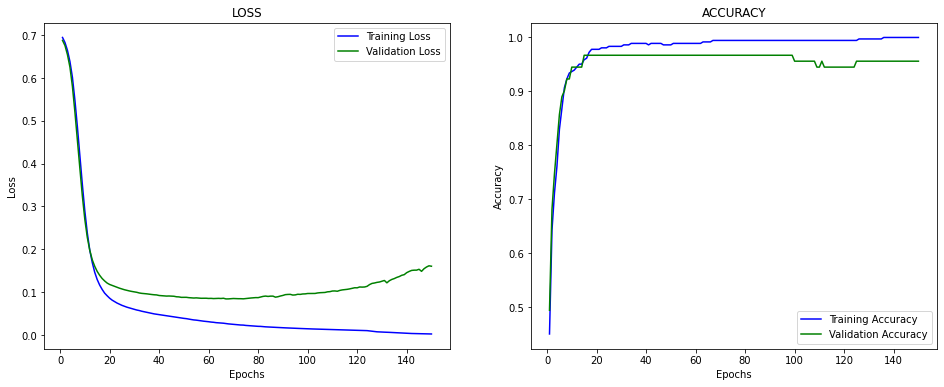

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(range(1,151), h.history['loss'], c = 'b', label = 'Training Loss')
plt.plot(range(1,151), h.history['val_loss'], c = 'g', label = 'Validation Loss')
plt.legend()
plt.title("LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(range(1,151), h.history['accuracy'], c = 'b', label = 'Training Accuracy')
plt.plot(range(1,151), h.history['val_accuracy'], c = 'g', label = 'Validation Accuracy')
plt.legend()
plt.title("ACCURACY")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
Y_pred = [1 if y>=0.5 else 0 for y in Y_pred]

In [16]:
total = 0
correct = 0
wrong = 0
for i in range (len(Y_pred)):
    total +=1
    if(y_test[i] == Y_pred[i]):
        correct+=1
    else:
        wrong+=1

print('Total : ',total)
print('Correct : ',correct)
print('Wrong : ',wrong)

Total :  114
Correct :  112
Wrong :  2


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


acc = accuracy_score(y_test, Y_pred)
prec = precision_score(y_test, Y_pred)
rec = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)


print('Accuracy: ',acc*100,'%')
print('Precision: ',prec)
print('Recall: ',rec)
print('F1 score: ',f1)

Accuracy:  98.24561403508771 %
Precision:  0.9726027397260274
Recall:  1.0
F1 score:  0.9861111111111112


<AxesSubplot:>

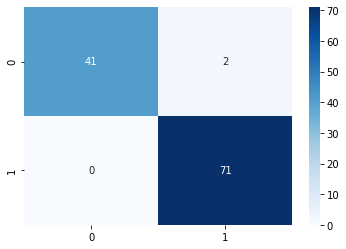

In [18]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot = True, cmap='Blues')

In [19]:
import tensorflow as tf
from keras.models import load_model

model.save('Breast_Cancer_Classification.h5')